In [1]:
import pandas as pd 
import pymysql 
import pymysql.cursors
import numpy as np
from scipy.stats import chisquare
from scipy import stats
import scipy as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit, glm
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [4]:
# dog1 = pd.read_excel("c:\import\gihosung\dog1_test_result.xlsx")
# dog2 = pd.read_excel("c:\import\gihosung\dog2_test_result.xlsx")
# cat_zero = pd.read_excel("c:\import\gihosung\cat_zero_test_result.xlsx")
# cat_zero2 = pd.read_excel("c:\import\gihosung\cat_zero2_test_result.xlsx")
cat_dongdong = pd.read_excel("c:\import\gihosung\s_1_test_result\cat_zero_test_result_2.xlsx")

,pc_ratio
0,2.994253e-01
1,2.018665e-01
2,1.391016e-01
3,1.288257e-01
4,1.014888e-01
5,4.898610e-02
6,3.423267e-02
7,2.724054e-02
8,1.301434e-02
9,5.818577e-03


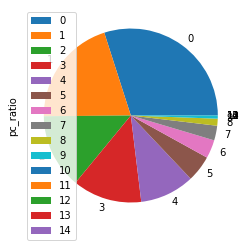

In [36]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(df)

PC_score = pca.transform(df)
#df는 독립변수모음

# # pca의 eigen_vector
# pca.components_

# #explained_variacne를 통해서 PC값의 설명력을 확인 할 수 있다.PC값이 클수록 설명력이 높다.
# pca.explained_variance_ 

# # explained_variance 비율로 확인
# ratio = pca.explained_variance_ratio_ 
# ratio


# 설명력 정도 확인
df_v = pd.DataFrame(ratio,  columns=['pc_ratio'])
df_v.plot.pie(y='pc_ratio')
df_v


In [4]:
#회귀분석 고양이
model = smf.ols (formula= 'little_score ~ p_cow + p_chicken + p_fish + p_turkey + p_sheep + p_pig + p_duck + p_salmon + p_tuna  + o_chicken + o_fish + flavor  ',data = cat_dongdong).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           little_score   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                 -0.257
Method:                 Least Squares   F-statistic:                    0.6588
Date:                Thu, 13 Jan 2022   Prob (F-statistic):              0.725
Time:                        18:18:11   Log-Likelihood:                -25.009
No. Observations:                  16   AIC:                             70.02
Df Residuals:                       6   BIC:                             77.74
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1615      2.390      0.486      0.6

C:\visual studio\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [16]:

cat_dongdong['intercept'] = 1.0
x = cat_dongdong[['p_cow' , 'p_chicken' , 'p_fish' , 'p_turkey' , 'p_sheep' ,  'p_salmon' , 'p_tuna'  , 'o_chicken' , 'o_fish' , 'flavor','intercept']]
y = cat_dongdong[['ox_score']]

logit = sm.Logit(y,x).fit()
print(logit.summary2())

         Current function value: 0.914321
         Iterations: 35


LinAlgError: Singular matrix

In [29]:
#회귀분석 강아지
model = smf.ols (formula= 'big_score ~ 소 + 돼지 + 양 + 식물성 + 닭 + 칠면조 + 생선 + 계유 + 어유 + 식물성지방 + 향미제  ',data = dog2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              big_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 06 Jan 2022   Prob (F-statistic):                nan
Time:                        13:30:30   Log-Likelihood:                 287.27
No. Observations:                  10   AIC:                            -554.5
Df Residuals:                       0   BIC:                            -551.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    293.1818        inf          0        n

C:\visual studio\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\visual studio\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\visual studio\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\visual studio\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [7]:
find_score = pd.read_excel("c:\import\gihosung\s_find_score_default_0109.xlsx", sheet_name = "취급O단백질사료")
#protein_content = pd.read_excel("c:\import\gihosung\s_product_protein_contain.xlsx")

protein_content = pd.read_excel( "c:\import\gihosung\s_product_protein_contain2.xlsx" , sheet_name = "Sheet1") 
#,usecols= [0,1,2,3,4,5,6,7,8,9,10,11,12]

In [8]:


protein_list = protein_content['class'].tolist()
for index, data in enumerate(protein_list) :
    if data == "소" :
        find_score.loc[find_score.product_id == protein_content['product_id'][index],'p_cow'] = 1
    if data == "닭" :
        find_score.loc[find_score.product_id == protein_content['product_id'][index],'p_chicken'] = 1
    if data == "생선":
        find_score.loc[find_score.product_id == protein_content['product_id'][index],'p_fish'] = 1
    if data == "칠면조" :
        find_score.loc[find_score.product_id == protein_content['product_id'][index],'p_turkey'] = 1
    if data == "양" :
        find_score.loc[find_score.product_id == protein_content['product_id'][index],'p_sheep'] = 1
    if data == "돼지" :
        find_score.loc[find_score.product_id == protein_content['product_id'][index],'p_pig'] = 1
    if data == "오리" :
        find_score.loc[find_score.product_id == protein_content['product_id'][index],'p_duck'] = 1
    if data == "참치" :
        find_score.loc[find_score.product_id == protein_content['product_id'][index],'p_tuna'] = 1
    if data == "연어" :
        find_score.loc[find_score.product_id == protein_content['product_id'][index],'p_salmon'] = 1
    if data == "식물성" :
        find_score.loc[find_score.product_id == protein_content['product_id'][index],'p_vegetable'] = 1
    if data == "곤충" :
        find_score.loc[find_score.product_id == protein_content['product_id'][index],'p_insect'] = 1
    if data == "유제품" :
        find_score.loc[find_score.product_id == protein_content['product_id'][index],'p_milk'] = 1
    if data == "칠면조" :
        find_score.loc[find_score.product_id == protein_content['product_id'][index],'p_turkey'] = 1
    
    
        
            

In [104]:
find_score.to_excel('find_score_default_new2.xlsx')


In [93]:
protein_number_list = protein_content['protein_number'].tolist()
for index, data in enumerate(protein_number_list) :
    if data == 0 :
        print(index)


123
125
126
139
144
150
167
181
185
186
492
494
496
499
503
554
555
583
586
590
592
627
637
688
738
741
744
747
776
778
780
788
791
801
813
819
824
856
857
938
942
957
960
963
968
971
1133
1136
1148
1172
1178
1198
1199
1206
1226
1236
1239
1242
1273
1296
1299
1302
1316
1359
1362
1365
1368
1378
1381
1394
1402
1405
1408
1411
1414
1417
1420
1423
1439
1445
1453
1529
1531
1534
1535
1541
1547
1554
1586
1589
1592
1604
1606
1609
1610
1612
1615
1616
1644
1648
1684
1688
1696
1702
1704
1713
1719
1722
1725
1728
1731
1734
1737
1739
1740
1743
1746
1749
1752
1754
1757
1760
1763
1777
1779
1785
1841
1847
1953
1956
1958
1959
1961
1962
1964
1965
1967
1968
1970
1971
1978
1981
1984
1985
1986
1988
1989
1991
1992
1993
1994
1995
1996
1997
1998
2000
2001
2005
2006
2007
2009
2010
2012
2013
2016
2018
2019
2023
2071
2097
2100
2102
2107
2109
2114
2136
2144
2151
2195
2229
2282
2330
2348
2349
2383
2489
2512
2514
2516
2534
2535
2538
2540
2541
2543
2544
2546
2548
2550
2552
2581
2672
2674
2676
2678
2802
2809
2814
2825
2

In [34]:
protein_content['protein_number'][protein_content['product_id'] == 1] == 1 

0        False
11928    False
17941    False
Name: protein_number, dtype: bool

In [31]:
find_score.at[find_score['product_id']==1,'p_cow'] = 1

In [16]:
protein_content[protein_content['product_id'] == 1]['protein_number']

0        2
11928    7
17941    4
Name: protein_number, dtype: int64